### Imports and configs

In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import torch
import numpy as np


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### plot histogram of data distribution

In [2]:
preprocd_data = torch.load("artifacts/saved_data/preprocd_data.pt").numpy()
sent_pairs, languages, max_len = preprocd_data.shape
aggregated_data = preprocd_data.reshape([sent_pairs * languages, max_len])

In [3]:
def plot_token_hist(data):

    # Count occurrences of values equal to 2 and not equal to 2
    count_equal_to_2 = np.sum(data == 2)
    count_not_equal_to_2 = np.sum(data != 2)

    # Plot histogram with two bars
    plt.bar(['Token=2', 'Token!=2'], [count_equal_to_2, count_not_equal_to_2], color=['blue', 'orange'])
    plt.xlabel('Entry')
    plt.ylabel('Count')
    plt.title('Histogram of Token=2 and Token!=2')
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()

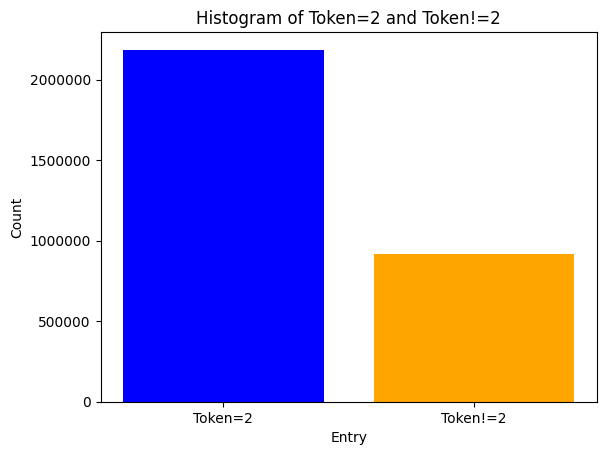

In [4]:
plot_token_hist(aggregated_data)

In [5]:
nonpad_token_count = np.sum(preprocd_data != 2)
pad_token_count = np.sum(preprocd_data == 2)
total_token_count = pad_token_count + nonpad_token_count
percent_nonpad = nonpad_token_count / total_token_count * 100
print(f"nonpad_token_count: {nonpad_token_count}\n"
      f"pad_token_count: {pad_token_count}\n"
      f"total_token_count: {total_token_count}\n"
      f"percent_nonpad: {percent_nonpad:2f} %\n")

nonpad_token_count: 916374
pad_token_count: 2185226
total_token_count: 3101600
percent_nonpad: 29.545202 %



In [6]:
nonpad_sums = np.sum(aggregated_data != 2, axis=1)

In [7]:
longest_sentence = nonpad_sums.max()
shortest_sentence = nonpad_sums.min()
avg_sentence = np.mean(nonpad_sums)
print(f"longest_sentence: {longest_sentence} tokens\n"
      f"shortest_sentence: {shortest_sentence} tokens\n"
      f"avg_sentence: {avg_sentence:2f} tokens\n"
      )

longest_sentence: 46 tokens
shortest_sentence: 2 tokens
avg_sentence: 14.772601 tokens



### histogram of sentence lengths

In [8]:
def plot_sentence_lens(data, title):
    plt.imshow(data != 2, aspect='auto')
    plt.xlabel("Sentence lengths")
    plt.ylabel("Sentence number")
    plt.title(title)
    plt.grid(True)
    plt.show()

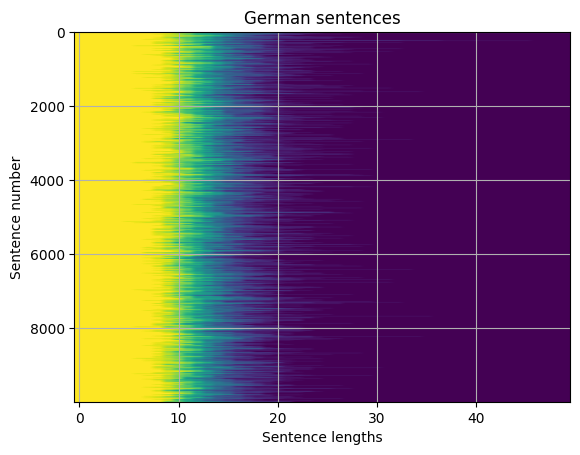

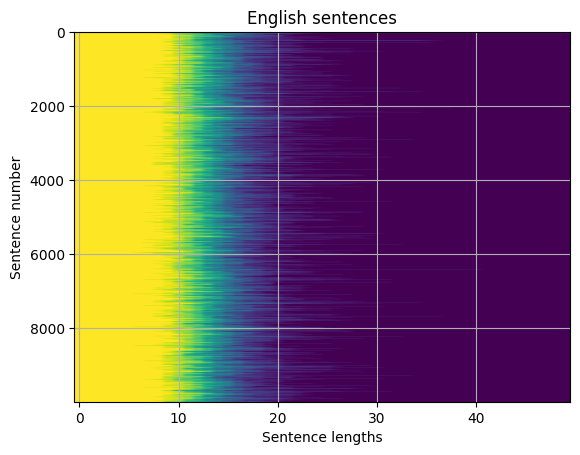

In [9]:
plot_sentence_lens(preprocd_data[:10000, 0, :], "German sentences")
plot_sentence_lens(preprocd_data[:10000, 1, :], "English sentences")

##### histogram of sentence lengths

In [10]:
nonpad_token_counts = np.count_nonzero(preprocd_data != 2, axis=2)

In [11]:
ger_nonpad_token_counts = nonpad_token_counts[:,0]
eng_nonpad_token_counts = nonpad_token_counts[:,1]

In [12]:
ger_nonpad_token_counts

array([15, 10, 12, ..., 17,  9, 13])

counts: [0.000e+00 0.000e+00 2.000e+00 2.000e+00 1.000e+00 3.000e+00 2.600e+01
 1.620e+02 6.340e+02 1.591e+03 2.423e+03 3.068e+03 3.449e+03 3.458e+03
 3.102e+03 2.714e+03 2.295e+03 1.828e+03 1.523e+03 1.211e+03 8.780e+02
 7.070e+02 4.980e+02 3.840e+02 3.080e+02 2.180e+02 1.290e+02 1.130e+02
 8.600e+01 5.400e+01 4.700e+01 2.200e+01 1.800e+01 1.900e+01 1.200e+01
 6.000e+00 8.000e+00 7.000e+00 6.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00 0.000e+00 0.000e+00]


[]

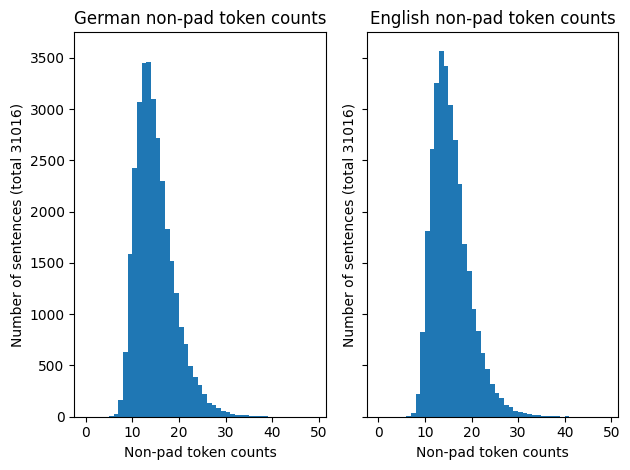

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
counts, bins, _ = axs[0].hist(ger_nonpad_token_counts, bins=range(50))
print(f'counts: {counts}')
axs[1].hist(eng_nonpad_token_counts, bins=range(50))
axs[0].set_title('German non-pad token counts')
axs[1].set_title('English non-pad token counts')
axs[0].set_xlabel('Non-pad token counts')
axs[0].set_ylabel(f'Number of sentences (total {len(ger_nonpad_token_counts)})')
axs[1].set_xlabel('Non-pad token counts')
axs[1].set_ylabel(f'Number of sentences (total {len(eng_nonpad_token_counts)})')
plt.plot()

In [20]:
training_bleu_N1 = []
validation_bleu_N1 = []
with open('training_history_N1.txt') as f:
    lines = f.readlines()
    for line in lines:
        if "Epoch:" in line:
            parts = line.split("|")
            tbleu = float(parts[1].split("BLEU: ")[-1].strip())
            vbleu = float(parts[2].split("BLEU: ")[-1].strip())
            training_bleu_N1.append(tbleu)
            validation_bleu_N1.append(vbleu)


In [ ]:
training_bleu_N1

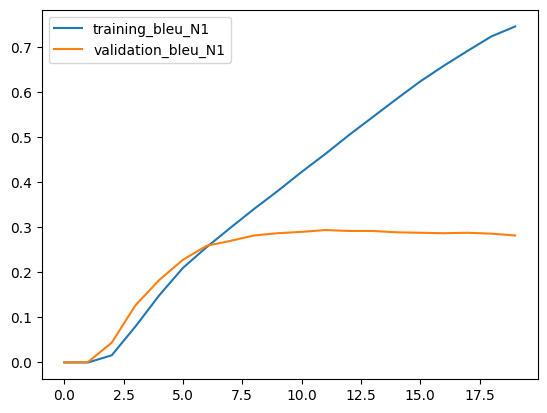

In [25]:
plt.figure()
plt.plot(training_bleu_N1, label='training_bleu_N1')
plt.plot(validation_bleu_N1, label='validation_bleu_N1')
plt.legend()

In [26]:
training_bleu_N6 = []
validation_bleu_N6 = []
with open('training_history_N6.txt') as f:
    lines = f.readlines()
    for line in lines:
        if "Epoch:" in line:
            parts = line.split("|")
            tbleu = float(parts[1].split("BLEU: ")[-1].strip())
            vbleu = float(parts[2].split("BLEU: ")[-1].strip())
            training_bleu_N6.append(tbleu)
            validation_bleu_N6.append(vbleu)

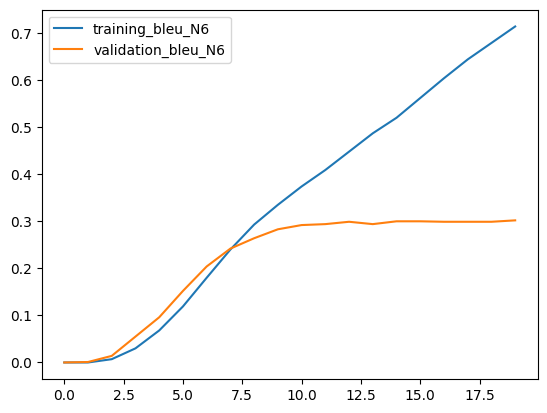

In [27]:
plt.figure()
plt.plot(training_bleu_N6, label='training_bleu_N6')
plt.plot(validation_bleu_N6, label='validation_bleu_N6')
plt.legend()